In [1]:
import os
import numpy as np
import scipy as sp
import librosa
import matplotlib.pyplot as plt
import IPython
import sounddevice as sd
import soundfile as sf
%matplotlib inline

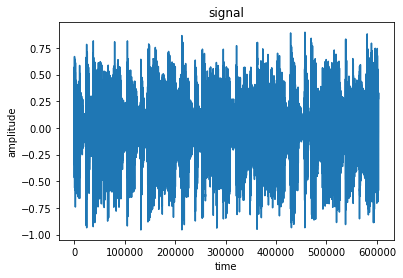

C:\Users\kgk\AppData\Local\Temp/ipykernel_5224/3105730422.py:18: RuntimeWarning: invalid value encountered in true_divide
  x1 = x1 / abs(x1)


In [2]:
#ΒΗΜΑ 1.0

xs, fs = sf.read('music.wav')

x1 = []

x1 = (xs[:,0] + xs [:,1]) / 2

N = len(x1)
n = np.arange(0,N,1)
plt.plot(n,x1)
plt.xlabel("time")
plt.ylabel("amplitude")
plt.title("signal")
plt.show()


x1 = x1 / abs(x1)
y = []






x = []

counter = 0

for i,n in enumerate(x1):
    if (counter == 512): 
        y.append(np.hamming(512)*x) #y = [w(512)*x[:512],w(512)*x[512:1024],......]
        counter = 0
        x = []
    else: 
        counter = counter + 1
        x.append(n);  
        


1175


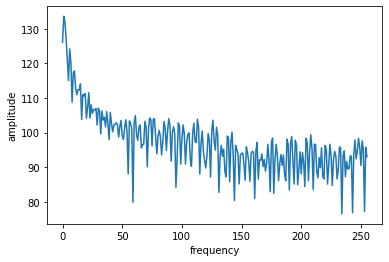

In [3]:
#ΒΗΜΑ 1.1
N = 512
Y = []

rows = len(y)

print(rows)

for i in range(rows):
    Y.append(abs(np.fft.fft(y[i],N))**2)

P = []
PN = 90.302

for i in range(rows):
        P.append(PN + 10*np.log10(Y[i]))

for i in range(rows):
    P[i] = P[i][:(N//2)]
    
n = np.arange(0,N//2,1)
plt.plot(n,P[1])
plt.xlabel("frequency")
plt.ylabel("amplitude")
plt.show()

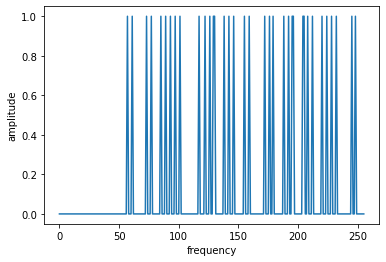

In [4]:
ST = []

for i in range(rows): 
    x = [] 
    for k in range(256): 
        if (k <= 2 or k >= 250): 
            x.append(0) 
            continue

        if(k < 63 and k > 2):
            if(P[i][k-2] + 7 < P[i][k] and P[i][k+2] + 7 < P[i][k]):
                x.append(1)
            else:
                x.append(0)

        elif(k >=63 and k < 127):
                if(P[i][k-2] + 7 < P[i][k] and P[i][k+2] + 7 < P[i][k]):
                    x.append(1)
                elif(P[i][k-3] + 7 < P[i][k] and P[i][k+3] + 7 < P[i][k]):
                    x.append(1)
                else:
                    x.append(0)

        elif(k >=127 and k <= 249):
            if(P[i][k-2] + 7 < P[i][k] and P[i][k+2] + 7 < P[i][k]):
                x.append(1)
                continue
            elif(P[i][k-3] + 7 < P[i][k] and P[i][k+3] + 7 < P[i][k]):
                x.append(1)
                continue
            elif(P[i][k-4] + 7 < P[i][k] and P[i][k+4] + 7 < P[i][k]):
                x.append(1)
                continue
            elif(P[i][k-5] + 7 < P[i][k] and P[i][k+5] + 7 < P[i][k]):
                x.append(1)
                continue
            elif(P[i][k-6] + 7 < P[i][k] and P[i][k+6] + 7 < P[i][k]):
                x.append(1)
            else:
                x.append(0)

    ST.append(x)
    
n = np.arange(0,N//2,1) 
plt.plot(n,ST[1]) 
plt.xlabel("frequency") 
plt.ylabel("amplitude") 
plt.show()

1179


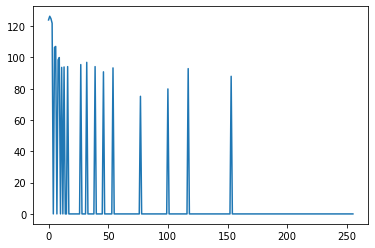

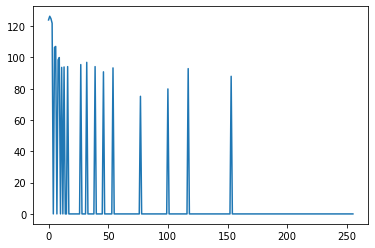

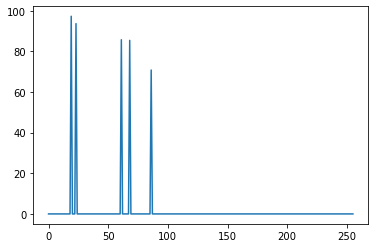

In [5]:
#ΒΗΜΑ 1.3
PNM = np.load('P_NM.npy')
pnmc= np.load ('P_NMc.npy')
ptmc= np.load ('P_TMc.npy')


PNM = np.transpose(PNM)
pnmc = np.transpose(pnmc)
ptmc = np.transpose(ptmc)

print(len(PNM))

n=np.arange(0, len(PNM[1]), 1)
plt.plot(n, PNM[1])
plt.show()

n=np.arange(0, len(pnmc[1]), 1)
plt.plot(n, pnmc[1])
plt.show()

n=np.arange(0, len(ptmc[1]), 1)
plt.plot(n, ptmc[1])
plt.show()


In [6]:
#ΒΗΜΑ 1.4

k = np.arange(0,256,1)


b = 13 * np.arctan(0.00076*k) + 3.5 * np.arctan((k/7500)**2)


SF = np.zeros((1179,256,256))

for l in range(len(pnmc)):
    for j in range(len(pnmc[0])):
        if (ptmc[l][j] > 0):
            for i in range(256):
                if (b[j]-3 <= b[i] and b[i] <= b[j] + 8):
                    Db = b[i] - b[j]
                    if (Db >= -3 and Db < -1):
                        SF[l][i][j] = 17*Db - 0.4*ptmc[l][j] + 11
                    elif (Db >= -1 and Db < 0):
                        SF[l][i][j] = (0.4*ptmc[l][j] + 6)*Db
                    elif (Db >= 0 and Db < 1):
                        SF[l][i][j] = (-17)*Db
                    elif (Db >= 1 and Db < 8):
                        SF[l][i][j] = (0.15*ptmc[l][j]-17)*Db - 0.15*ptmc[l][j]
                
            

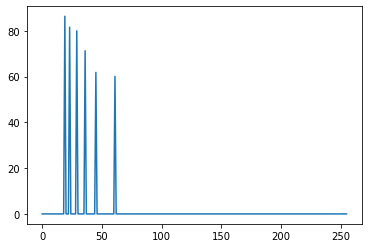

In [8]:
TTM = np.zeros((1179,256,256))

for l in range(len(pnmc)):
    for j in range(len(pnmc[0])):
        if (ptmc[l][j] > 0):
            for i in range(256):
                TTM[l][i][j] = ptmc[l][j] - 0.275*b[j] + SF[l][i][j] - 6.025
                
n = np.arange(0,256,1)
plt.plot(n,TTM[0][0])

In [9]:
SF = np.zeros((1179,256,256))

for l in range(len(pnmc)):
    for j in range(len(pnmc[0])):
        if (pnmc[l][j] > 0):
            for i in range(256):
                if (b[j]-3 <= b[i] and b[i] <= b[j] + 8):
                    Db = b[i] - b[j]
                    if (Db >= -3 and Db < -1):
                        SF[l][i][j] = 17*Db - 0.4*pnmc[l][j] + 11
                    elif (Db >= -1 and Db < 0):
                        SF[l][i][j] = (0.4*pnmc[l][j] + 6)*Db
                    elif (Db >= 0 and Db < 1):
                        SF[l][i][j] = (-17)*Db
                    elif (Db >= 1 and Db < 8):
                        SF[l][i][j] = (0.15*pnmc[l][j]-17)*Db - 0.15*pnmc[l][j]
                

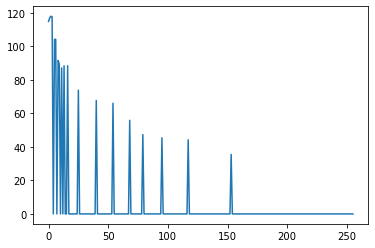

In [10]:
TNM = np.zeros((1179,256,256))

for l in range(len(pnmc)):
    for j in range(len(pnmc[0])):
        if (pnmc[l][j] > 0):
            for i in range(256):
                TNM[l][i][j] = pnmc[l][j] - 0.175*b[j] + SF[l][i][j] - 2.025
                
n = np.arange(0,256,1)
plt.plot(n,TNM[0][0])

In [11]:
f = np.arange(0,256,1)

t1 = (3.64*(f/1000))**(-0.8)
t2 = -0.6*(f/1000-3.3)**2
t2 = -6.5*np.exp(t2)
t3 = ((f/1000)**4)* (10**(-3))

tq = t1 + t2 + t3

C:\Users\kgk\AppData\Local\Temp/ipykernel_5224/2871565289.py:3: RuntimeWarning: divide by zero encountered in power
  t1 = (3.64*(f/1000))**(-0.8)


In [12]:
Tg = np.zeros((1179,256))

for l in range(len(pnmc)):
    for j in range(len(pnmc[0])):
        sum1 = 0
        sum2 = 0
        if (pnmc[l][j] > 0):
            for i in range(256):
                sum1 += 10**(0.1*TNM[l][i][j])
        if (ptmc[l][j] > 0):
            for i in range(256):
                sum2 += 10**(0.1*TTM[l][i][j])
        T = 10**(0.1*tq[j]) + sum1 + sum2
        Tg[l][j] = 10*np.log10(T)

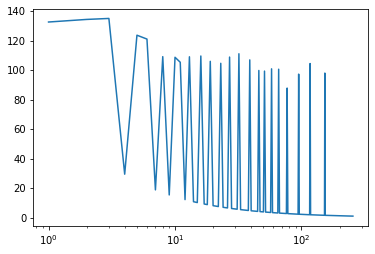

In [13]:
n = np.arange(0,256,1)

plt.semilogx(n,Tg[3])
plt.show()

In [14]:
R = 2 ** 12
Bk = np.zeros(1179)

for i in range(1179):
    l = min(Tg[i]) 
    l = R / l
    l = np.log2(l) - 1
    Bk[i] = int(l)
    
    
    

In [15]:
print(Bk)

[10. 10. 10. ... 10. 10. 10.]


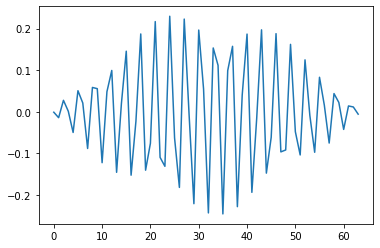

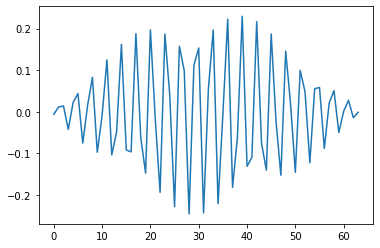

In [16]:
#ΒΗΜΑ 2.0

M = 32
L = 2*M

h = []

n = np.arange(0,L,1)


for k in range(32):
    p1 = (2*n+M+1)*(2*k+1)*np.pi
    p1 = p1 / (4*M)

    p2 = ((n + 0.5)*np.pi)/(2*M)

    t1 = np.cos(p1)
    t2 = np.sin(p2)

    h.append(t1*t2*0.25)



g = []
for k in range(32):
    x2 = []
    for i in range(L):
        x2.append(h[k][2*M -1 - i])
    g.append(x2)
        
plt.plot(n,h[20])
plt.show()



plt.plot(n,g[20])
plt.show()

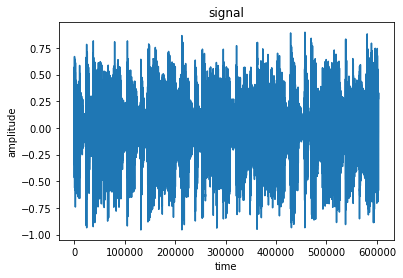

In [17]:
#ΒΗΜΑ 2.1 i) 
u = []


xs, fs = sf.read('music.wav')

x1 = []

x1 = (xs[:,0] + xs [:,1]) / 2

N = len(x1)
n = np.arange(0,N,1)
plt.plot(n,x1)
plt.xlabel("time")
plt.ylabel("amplitude")
plt.title("signal")
plt.show()


sf.write('music2.wav',x1,50000)


y = []






x = []

counter = 0

for i,n in enumerate(x1):
    if (counter == 512): 
        y.append(np.hamming(512)*x) #y = [w(512)*x[:512],w(512)*x[512:1024],......]
        counter = 0
        x = []
    else: 
        counter = counter + 1
        x.append(n);  





x = y

for i in range(rows):
    for j in range(32):
        u.append(np.convolve(x[i],h[j]))

In [18]:
rows1 = len(u)
colums = len(u[0])

y1 = []

for i in range(rows1):
    x1 = []
    for j in range(colums):
        if(j * M < colums):
            x1.append(u[i][j*M])
    y1.append(x1)

# y1[n] = u[n*M]   

In [19]:
def quantizer(y1,B):
    quantization_bits = B                                         
    y1_length = len(y1)                                           #number of samples of y1
    L = 2**quantization_bits
    
    D = 2 / float(2**quantization_bits)           #D = (max - min)/L

    quantization_levels = np.linspace(-(L-1)*D/2,(L-1)*D/2,L)     #define L quantization levels evenly, with distance D
   
    y1_quantized = [0 for x in range(y1_length)]

    for i in range(y1_length):                                    #i is the counter of the y1 samples
        j=0                                                       #j is the counter of the mid riser levels
        while (y1[i] > quantization_levels[j]):
            j += 1
            if j==2**quantization_bits:                           #prevent glitch after the last quantization level
                break
       
        if j==0:                                                  #prevent glitch at the first quantization level (j=0)
            y1_quantized[i] = quantization_levels[0]              
        elif j==2**quantization_bits:                             #prevent glitch after the last quantization level (j=16)
            j=2**quantization_bits-1
            y1_quantized[i] = quantization_levels[2**quantization_bits-1]
        else:
            d_low = y1[i] - quantization_levels[j-1]
            d_high = quantization_levels[j] - y1[i]

            if (d_low < d_high):                                    #this means we are closer to j-1 quantization_level
                y1_quantized[i] = quantization_levels[j-1]
                j = j - 1                                           #binary values table index
            else:                                                   #this means we are closer to j quantization_level
                y1_quantized[i] = quantization_levels[j]
                j = j                                               #binary values table index

    return(y1_quantized)

In [20]:
y1_hat = []

for i in range(rows1):
    y1_hat.append(quantizer(y1[i],8))

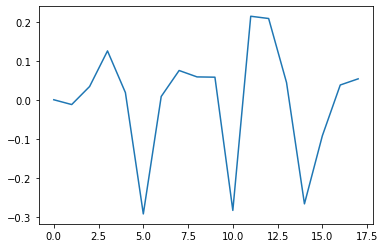

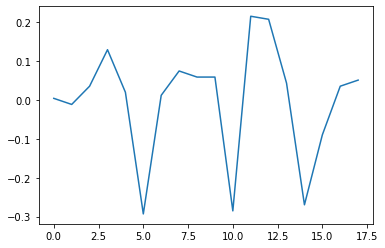

In [21]:
#plots y1, y1_hat

n = np.arange(0,len(y1[1]),1)
plt.plot(n,y1[1])
plt.show()

plt.plot(n,y1_hat[1])
plt.show()


In [22]:
# ΒΗΜΑ 2.3
w = []


for i in range(rows1):
    x2 = []
    for j in range(18):
        x2.append(y1_hat[i][j])
        for k in range(M-1):
            x2.append(0)
    w.append(x2)



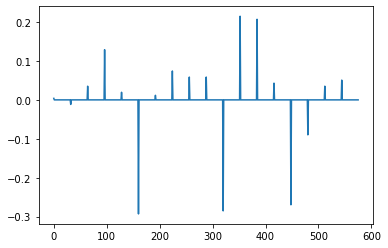

In [23]:
n = np.arange(0,len(w[1]),1)
plt.plot(n,w[1])
plt.show()

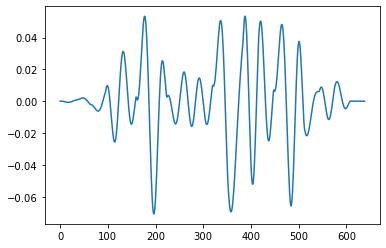

In [24]:
k = []
counter = 0

for i in range(rows1):
    k.append(np.convolve(w[i],g[counter]))
    counter = counter + 1
    if (counter == 32): 
        counter = 0
   
        
        
n = np.arange(0,len(k[1]),1)
plt.plot(n,k[1])
plt.show() 

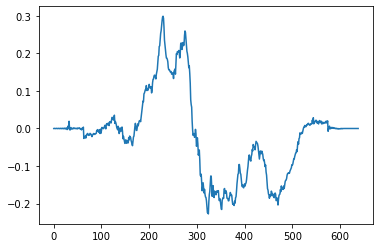

In [25]:
s = []
x2 = [0 for x in range(len(k[1]))]
counter = 0

for i in range(rows1):
    x2 = x2 + k[i]
    counter = counter + 1
    if (counter == 32):
        counter = 0
        s.append(x2)
        x2 = [0 for x in range(len(k[1]))]

n = np.arange(0,len(s[1]),1)
plt.plot(n,s[1])
plt.show()   

In [26]:
counter = 0
colums = len(s[1])

final = []

t = 1

for i in range(rows):
    t = 1
    while (t == 1):
        if (counter < 512):
                l = s[i][counter]
        elif (counter >= 512 and counter < 640 and i != rows-1):
            l = s[i][counter] + s[i+1][511 - counter]
        final.append(l) 
        counter = counter + 1
        if (counter == 639): 
            counter = 127
            break

In [27]:
sf.write('music1.wav',final,50000)

In [28]:
y1_hat = []

for i in range(rows1):
    y1_hat.append(quantizer(y1[i],int(Bk[i%32])))
    


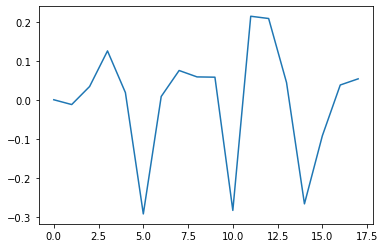

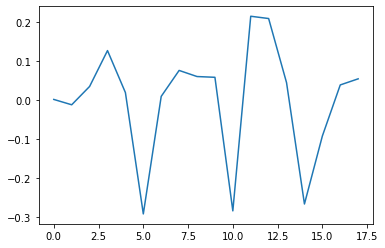

In [29]:
#plots y1, y1_hat

n = np.arange(0,len(y1[1]),1)
plt.plot(n,y1[1])
plt.show()

plt.plot(n,y1_hat[1])
plt.show()

In [30]:
# ΒΗΜΑ 2.3
w = []


for i in range(rows1):
    x2 = []
    for j in range(18):
        x2.append(y1_hat[i][j])
        for k in range(M-1):
            x2.append(0)
    w.append(x2)


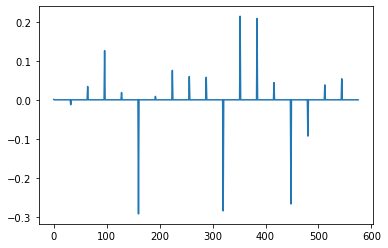

In [31]:
n = np.arange(0,len(w[1]),1)
plt.plot(n,w[1])
plt.show()

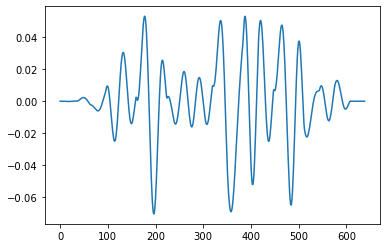

In [32]:
k = []
counter = 0

for i in range(rows1):
    k.append(np.convolve(w[i],g[counter]))
    counter = counter + 1
    if (counter == 32): 
        counter = 0
   
        
        
n = np.arange(0,len(k[1]),1)
plt.plot(n,k[1])
plt.show() 

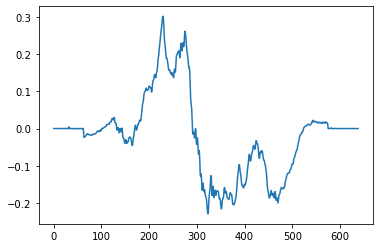

In [33]:
s = []
x2 = [0 for x in range(len(k[1]))]
counter = 0

for i in range(rows1):
    x2 = x2 + k[i]
    counter = counter + 1
    if (counter == 32):
        counter = 0
        s.append(x2)
        x2 = [0 for x in range(len(k[1]))]

n = np.arange(0,len(s[1]),1)
plt.plot(n,s[1])
plt.show()   

In [34]:
counter = 0
colums = len(s[1])

final = []

t = 1

for i in range(rows):
    t = 1
    while (t == 1):
        if (counter < 512):
                l = s[i][counter]
        elif (counter >= 512 and counter < 640 and i != rows-1):
            counter = 0
            break
            l = s[i][counter] + s[i+1][511 - counter]
        final.append(l) 
        counter = counter + 1
        if (counter == 639): 
            counter = 127
            break

In [35]:
sf.write('music2.wav',final,50000)